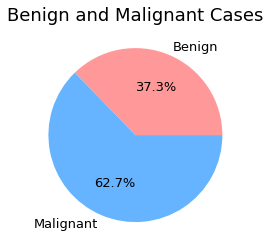

***** Train Dataset Length *****
455

***** Test Dataset Length *****
114
Support Vector Machine
Accuracy :  0.9210526315789473


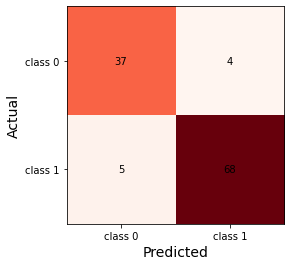

In [18]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer

def load_dataset():
    """Load the breast cancer dataset"""
    data = load_breast_cancer()
    X = data.data
    y = data.target
    return X, y

# Load the dataset
X, Y = load_dataset()
    
def plot_pie_chart(data):
    """
    This function creates a pie chart visualizing the proportion of benign and malignant cases in the breast cancer dataset
    """
    # Count the number of benign and malignant cases
    benign_count = len(data[data==0])
    malignant_count = len(data[data==1])

    # Create a list of the counts
    counts = [benign_count, malignant_count]

    # Create a list of the labels
    labels = ['Benign', 'Malignant']

    # Create the pie chart
    plt.pie(counts, labels=labels, autopct='%1.1f%%',colors=['#ff9999','#66b3ff'],textprops={'fontsize': 13})
    plt.title('Benign and Malignant Cases', fontsize=18)
    plt.show()
    
plot_pie_chart(y)    
    
def train_test_split_data(X,Y):
    """Splits the dataset into training and test sets"""
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=41, stratify=Y)

    print("***** Train Dataset Length *****")
    print(len(X_train))
    print("\n***** Test Dataset Length *****")
    print(len(X_test))
    
    return X_train, X_test, Y_train, Y_test


# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split_data(X,Y)    


def apply_SVM_model(X_train, Y_train, X_test):
    """
    This function applies a Support Vector Machine (SVM) model on the given training and test data.
    It then returns the predicted values for the test data.
    """
    s = svm.SVC()
    s.fit(X_train, Y_train)
    Y_pred = s.predict(X_test)

    print("Support Vector Machine")
    return Y_pred


Y_pred = apply_SVM_model(X_train, Y_train, X_test)

# calculating the accuracy of the model
ac_s = accuracy_score(Y_pred, Y_test)
print("Accuracy : ", ac_s)



def confusion_matrix_graph(Y_pred, Y_test):
    """
    This function creates a heatmap visualizing the confusion matrix
    between the predicted and actual values.
    """
    cm = confusion_matrix(list(Y_pred),list(Y_test))
    fig, ax = plt.subplots()
    ax.imshow(cm, cmap='Reds')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['class 0', 'class 1'])
    ax.set_yticklabels(['class 0', 'class 1'])
    ax.set_xlabel('Predicted', fontsize=14)
    ax.set_ylabel('Actual', fontsize=14)
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            ax.text(j, i, cm[i][j], ha='center', va='center', color='black')
    plt.show()



confusion_matrix_graph(Y_pred, Y_test)
